<a href="https://colab.research.google.com/github/priyakathuria/mobilepriceclassification/blob/main/Project1_Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

activation fucntion-sigmoid
show train accuracy as well
try with just 5 features

                   

## 1. Downloading the dataset directly from kaggle

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d iabhishekofficial/mobile-price-classification
! unzip mobile-price-classification.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 38.2MB/s]
Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


## 2. Importing the required libraries and accessing the data

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
!pip3 install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=c348f14fd9f1293c8b3aee807e092aab4095c102905850f75f1197b279a784e4
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [8]:
print(f'Shape of training dataframe: {train_data.shape}')
print(f'Shape of testing dataframe: {test_data.shape}')

Shape of training dataframe: (2000, 21)
Shape of testing dataframe: (1000, 21)


In [9]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# 3. Exploratory Data Analysis

### Check_1 : No of null values in dataset

In [10]:
train_data.isna().sum().any()

False

In [11]:
test_data.isna().sum().any()

False

0 null values in training and test dataset

### Check_2 : No of Categorical col in dataset

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Check_3 : Any duplicates in the training data

In [14]:
print(train_data.duplicated().any())


False


### Check_4 : Data distribution of target variable

In [15]:
train_data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: >

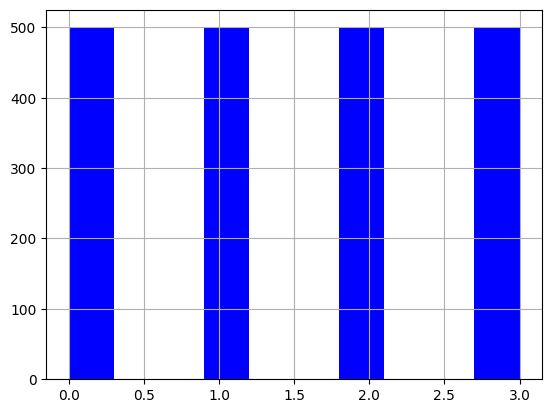

In [16]:
train_data['price_range'].hist(color="blue")

500 mobile phones in each of the following categories: low cost, medium cost, high cost, and very high cost

### Check_5 : Analysing the relationship between variables-Correlation

Text(0.5, 1.0, 'Correlation between variables')

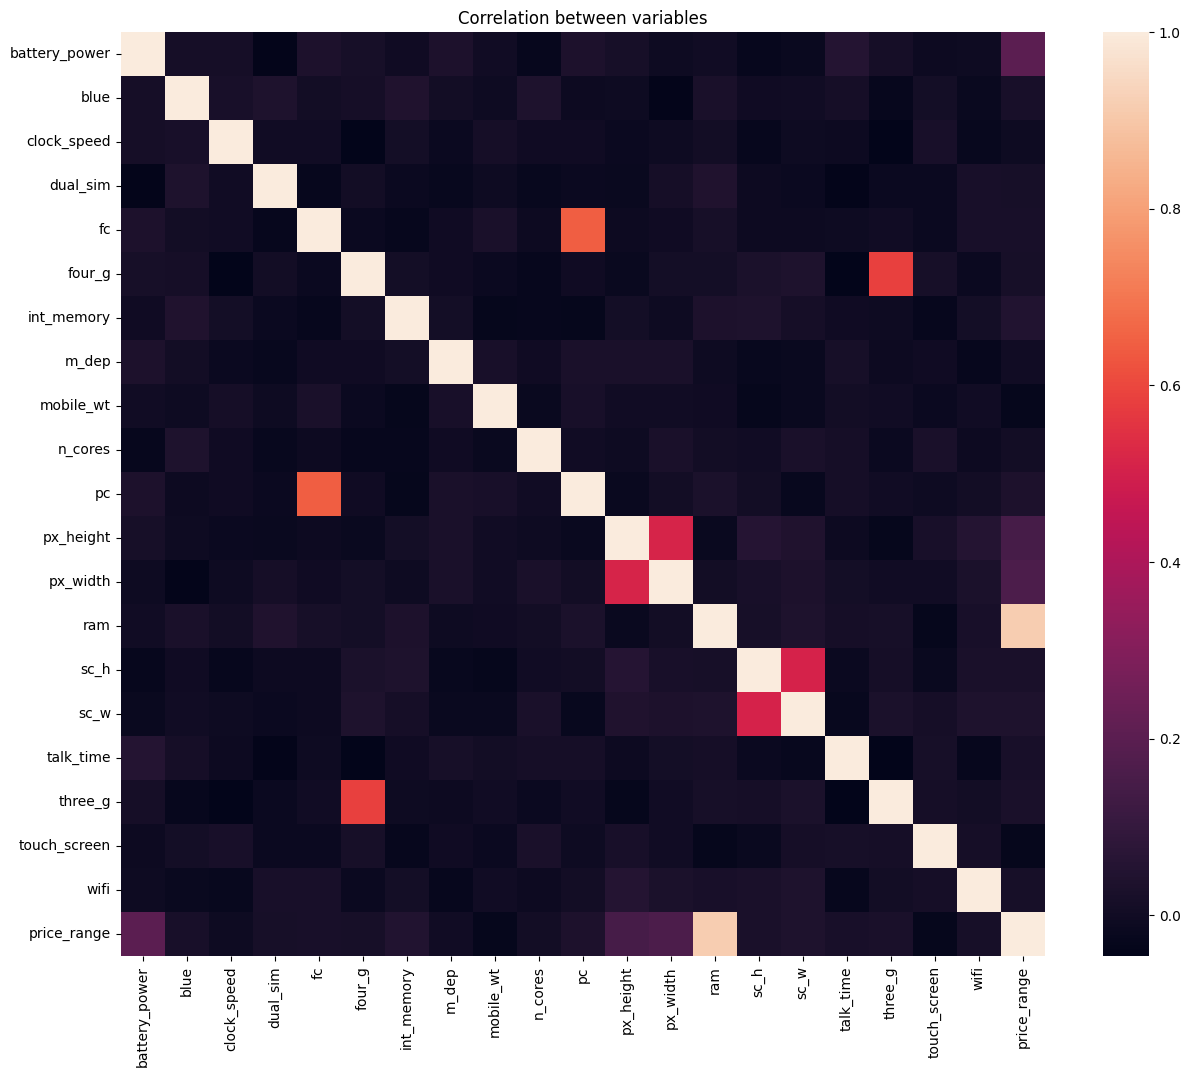

In [17]:
corr=train_data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, square = True)
r.set_title("Correlation between variables")

Conclusion from Correlation matrix:
>Price Range has strong correlation with RAM.
>The other relations between variables:
1. 3G and 4G
2. pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
3. px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
4. sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
* Features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

### Check_6 : Analysing the relationship between target variable and other features in dataset

**Display highest correlations between price_range and the other features in our dataset**

In [18]:
corr.abs()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

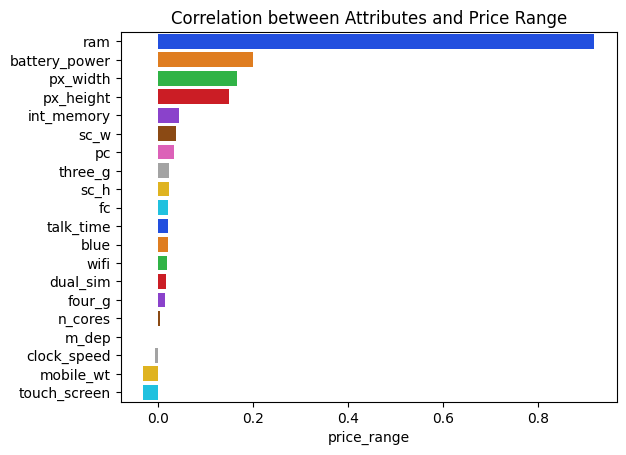

In [19]:
#we are not considering the correlations between X features among themselves
corr = train_data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

The highest correlations to our target variable (price_range) are:
1. RAM
2. battery_power
3. px_width
4. px_height

**Key Variables Visualisation**

1. Price Range and RAM

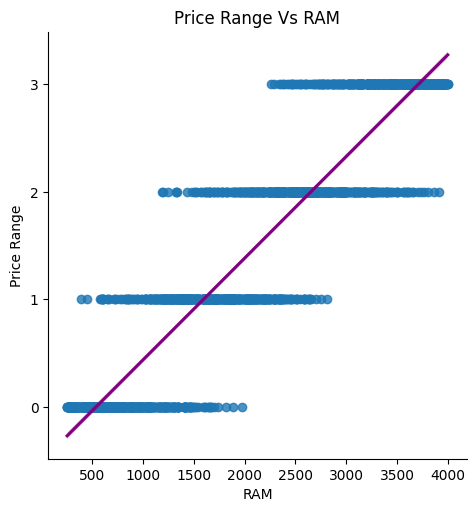

In [20]:
sns.lmplot(x='ram', y='price_range', data=train_data, line_kws={'color': 'purple'})
plt.yticks([0, 1, 2, 3])
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.title("Price Range Vs RAM")
plt.show()

The plot aboves shows the high correlation between RAM and price range. It shows the general pattern: as RAM increases, mobile's price increases

2. Price Range and batery power

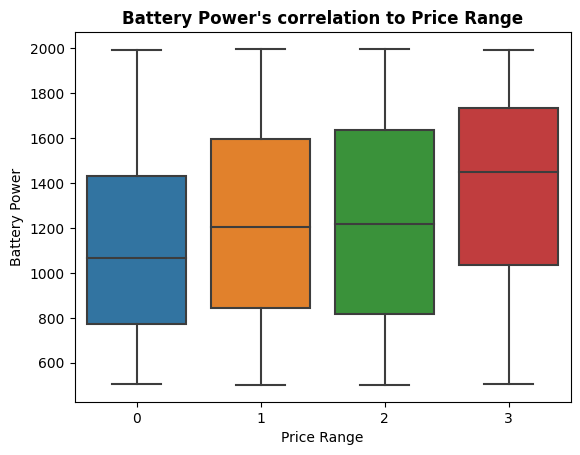

In [21]:
sns.boxplot(x='price_range', y='battery_power', data=train_data)
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power\'s correlation to Price Range', weight='bold')
plt.show()

### Check_7 : Visualising all the input features

Text(0.5, 0.98, 'Visualising all the input features')

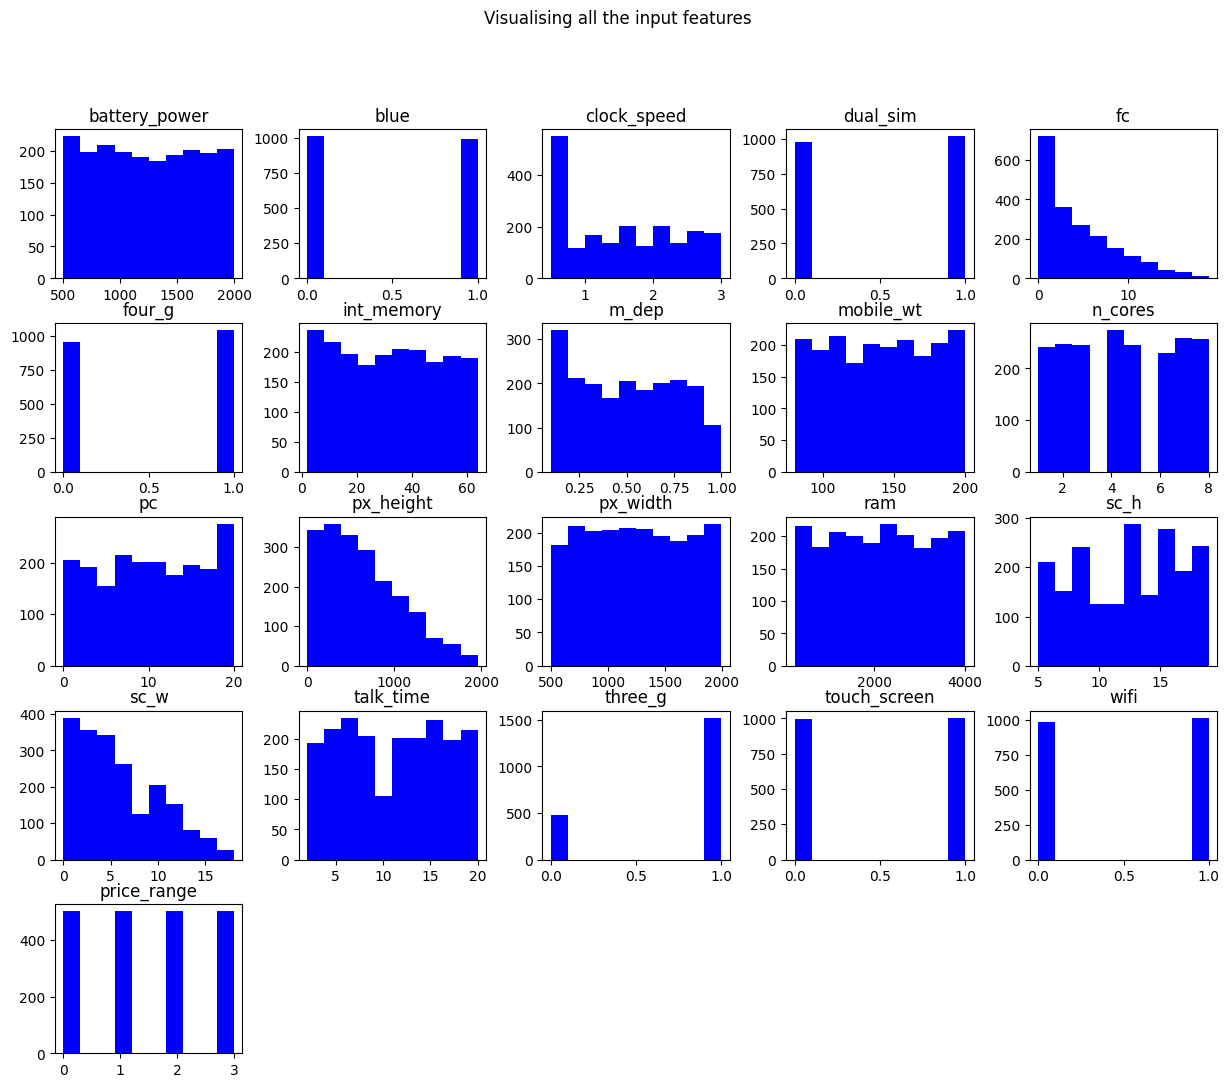

In [22]:
train_data.hist(layout=(5,5),color="blue", figsize=(15,12), grid=False)
plt.suptitle("Visualising all the input features")

### Check_8 : Outlier Analysis of Non-Categorical Data

In [23]:
features=train_data.columns

In [24]:
non_cat_attributes=['battery_power','clock_speed','fc','pc','px_width','sc_h','int_memory','m_dep','mobile_wt','n_cores','px_height','ram','sc_w','talk_time']

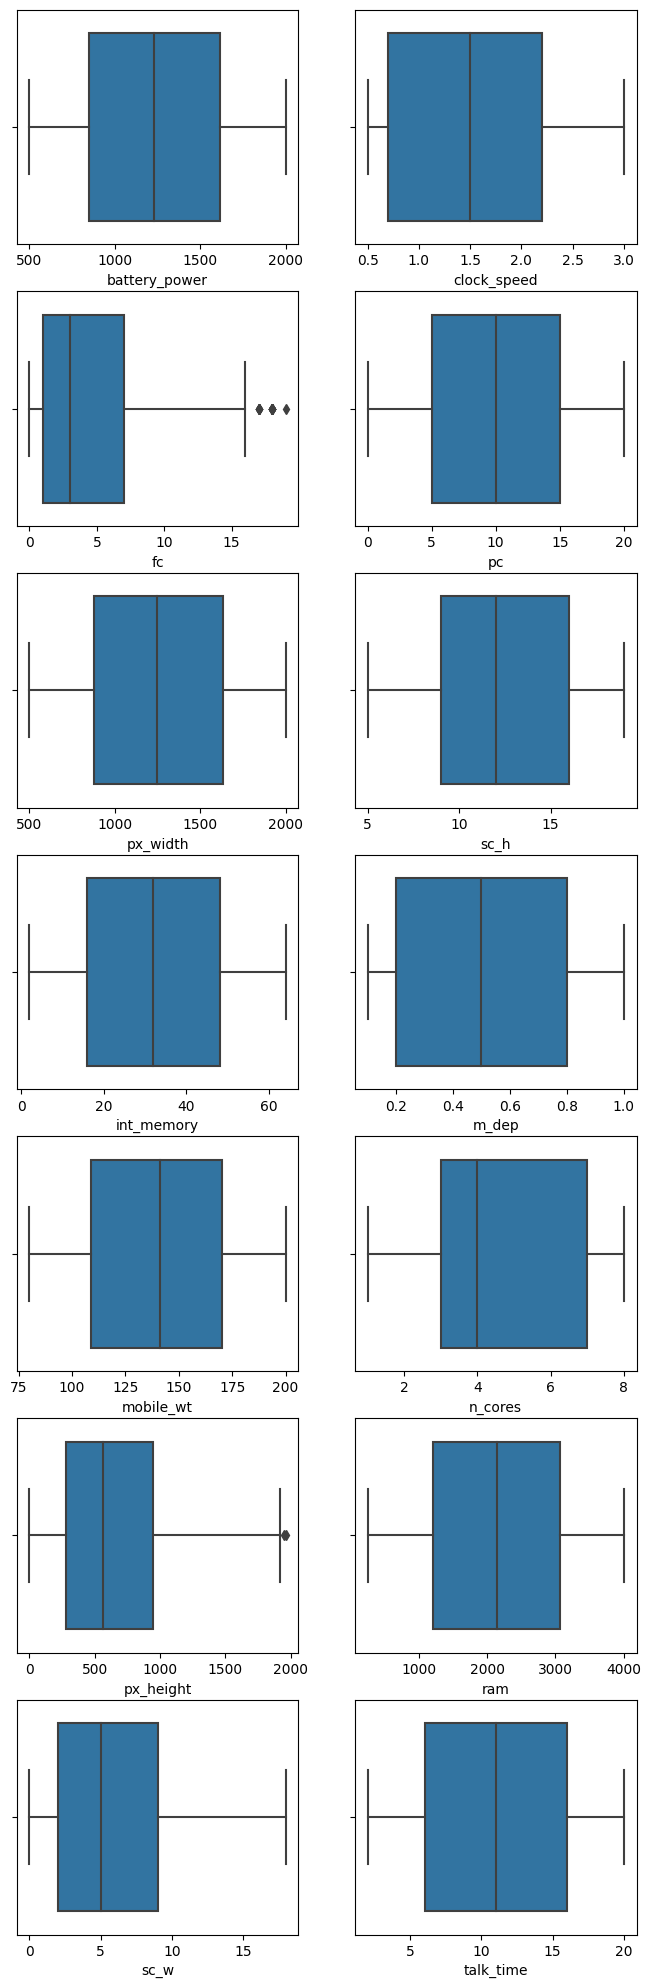

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(8,25))
k=0
for i in range(7):
  for j in range (2):
    sns.boxplot(x=train_data[non_cat_attributes[k]],ax=ax[i,j])
    k=k+1


There are a few outliers in fc and px_height only.

### Check_9 : Visualising and analysing the data in 2D

In [26]:
x,y = train_data.iloc[:,0:-1], train_data.iloc[:,-1]
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


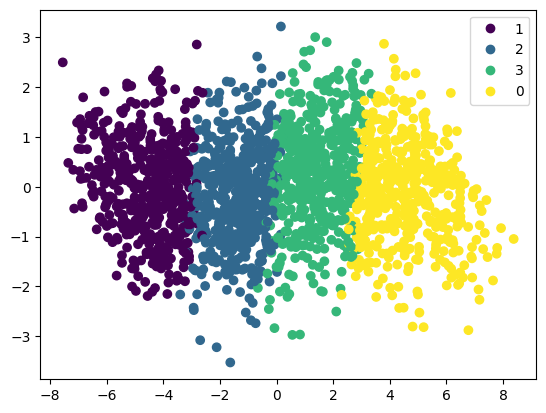

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
Xt = lda.fit_transform(x,y)
#plot = plt.scatter(Xt[:,0], Xt[:,1])
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(train_data['price_range'].unique()))
plt.show()

# 4.  Data Preprocessing

### 1. Check the no of outliers to be removed using Z-score

In [28]:
z = np.abs(stats.zscore(train_data))

In [29]:
threshold = 3
print(np.where(z > threshold))

(array([  95,  226,  305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
       1888]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [30]:
train_data_out1 = train_data[(z < 3).all(axis=1)]

In [31]:
train_data_out1.shape

(1988, 21)

Since the no of outliers are so less (12 out of 2000 rows) , it will not affect the model results and can be incorporated in the model

### 2. Splitting the train and test dataset

In [32]:
#splitting the features and output variable
x,y = train_data.iloc[:,0:-1], train_data.iloc[:,-1]
#Splitting the training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
x_train.shape

(1600, 20)

In [34]:
x_test.shape

(400, 20)

### 3. Class Imbalance Check

In [35]:
train_data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

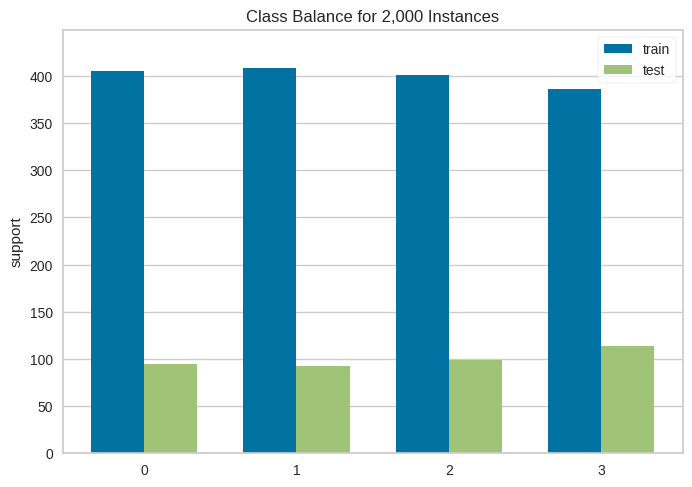

In [36]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=["0","1","2","3"])
visualizer.fit(y_train, y_test)
visualizer.poof()
plt.show()

There is no class imbalance in the data

### 4. Scaling of data

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

### 5. PCA Data Creation

Text(0, 0.5, 'Cumulative explained variance')

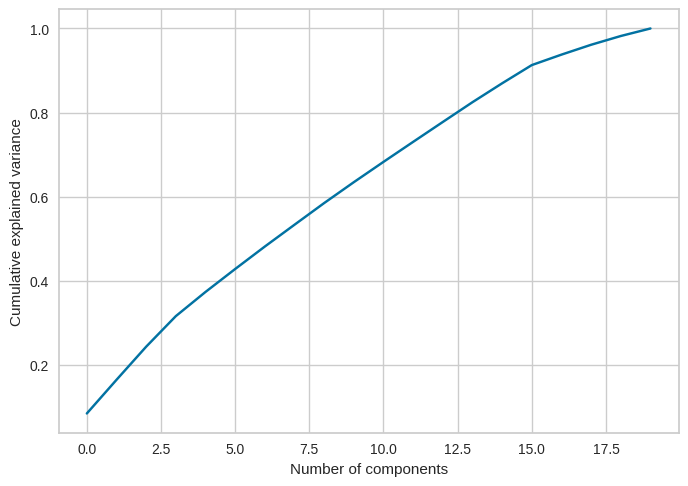

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(x_train_sc)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [39]:
#In plot above we can see that cumulative explained variance is  high near 15  
#Here we choose 15 to check how it will work as it seems to have most of the data around 95% variance
pca_components=15
pca = PCA(n_components=pca_components)
x_pca_train = pca.fit_transform(x_train_sc)
x_pca_test = pca.transform(x_test_sc)
pca_std = np.std(x_pca_train)

print(x_pca_train.shape)
print(x_pca_test.shape)

(1600, 15)
(400, 15)


### 6. Data Creation with best features selection

In [40]:
# Lets do some Feature Selection for better results and accuracy
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [41]:
kbest = SelectKBest(chi2,k=10)
best_feaures = kbest.fit(x,y)
best_feaures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [42]:
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(x.columns)

In [43]:
featureScores = pd.concat([df_columns,df_features],axis=1)

In [44]:
featureScores.columns = ['Features','Score']

In [45]:
featureScores.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [46]:
#x_best = x[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]

In [47]:
x_best = x[['ram','px_height','battery_power','px_width','mobile_wt']]

In [48]:
x_train_best, x_test_best, y_train_best, y_test_best = train_test_split(x_best, y, test_size = 0.2, random_state = 0)
sc1 = StandardScaler()
x_train_best_sc = sc1.fit_transform(x_train_best)
x_test_best_sc = sc1.transform(x_test_best)

In [49]:
print(x_train_best_sc.shape,x_test_best_sc.shape)

(1600, 5) (400, 5)


# 5. Implementation of ML Models

#### Fuction for checking performance for the model

In [50]:
#Function created for visualising confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    plt.figure(figsize = (4,3))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

### ML Model I- Logistic Regression

#### 1. With just standard scaled input

In [54]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(multi_class='multinomial')
lreg.fit(x_train_sc, y_train)
y_train_score=lreg.predict(x_train_sc)
y_pred = lreg.predict(x_test_sc)

Logistic Regression Classifier Training Accuracy Score:  97.8125
Logistic Regression Classifier Testing Accuracy Score:  95.5
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.94      0.92      0.93        92
           2       0.94      0.92      0.93        99
           3       0.96      0.99      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



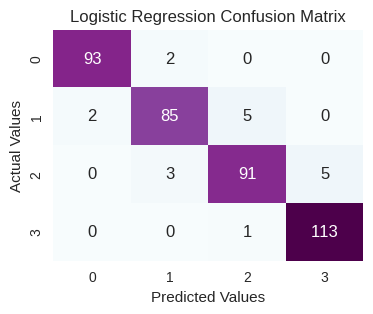

In [52]:
print('Logistic Regression Classifier Training Accuracy Score: ',accuracy_score(y_train,y_train_score)*100)
print('Logistic Regression Classifier Testing Accuracy Score: ',accuracy_score(y_test,y_pred)*100)
cm_log=my_confusion_matrix(y_test, y_pred, 'Logistic Regression Confusion Matrix')

#### 2. With Feature Selection input

In [64]:
lreg = LogisticRegression(multi_class='multinomial')
lreg.fit(x_train_best_sc, y_train_best)
y_pred = lreg.predict(x_test_best_sc)
y_pred_train = lreg.predict(x_train_best_sc)

Logistic Regression With Feature Selection Training Accuracy Score:  97.3125
Logistic Regression With Feature Selection Testing Accuracy Score:  97.5
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.94      0.98      0.96        92
           2       0.99      0.95      0.97        99
           3       0.99      0.99      0.99       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



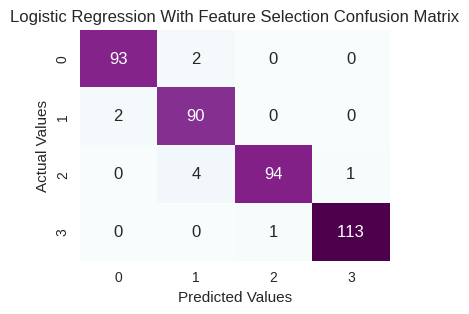

In [65]:
print('Logistic Regression With Feature Selection Training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('Logistic Regression With Feature Selection Testing Accuracy Score: ',accuracy_score(y_test,y_pred)*100)
cm_log=my_confusion_matrix(y_test_best, y_pred, 'Logistic Regression With Feature Selection Confusion Matrix')

#### 3. With hyperparamter tuning and feature selection

In [56]:
from sklearn.model_selection import GridSearchCV
LogBaseModel = LogisticRegression()
## Setting Parameter Grid
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'l1_ratio' : np.linspace(0,1,20),
    'C' : np.logspace(-10,10,30)
}
gridModel = GridSearchCV(LogBaseModel,
                        param_grid=param_grid,
                        cv=5)


In [57]:
#gridModel.fit(x_train_sc,y_train)
gridModel.fit(x_train_best_sc,y_train_best)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 4.89390092e-10, 2.39502662e-09, 1.17210230e-08,
       5.73615251e-08, 2.80721620e-07, 1.37382380e-06, 6.72335754e-06,
       3.29034456e-05, 1.61026203e-04, 7.88046282e-04, 3.85662042e-03,
       1.88739182e-02, 9.23670857e-02, 4.52035366e-01, 2.21221629e+00,
       1.08263673e+01, 5.29831691e+01, 2.592943...
       3.56224789e+06, 1.74332882e+07, 8.53167852e+07, 4.17531894e+08,
       2.04335972e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [58]:
gridModel.best_params_

{'C': 1268.9610031679233, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [61]:
#y_pred_2 = gridModel.predict(x_test_sc)
y_pred_2 = gridModel.predict(x_test_best_sc)
y_pred_train_2 = gridModel.predict(x_train_best_sc)

Logistic Regression With Feature Selection Training Accuracy Score:  97.75
Logistic Regression With Feature Selection Testing Accuracy Score:  97.5
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.95      0.98      0.96        92
           2       0.97      0.96      0.96        99
           3       0.99      0.98      0.99       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



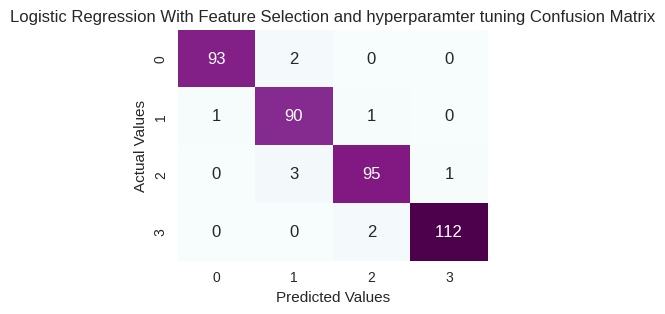

In [77]:
print('Logistic Regression With Feature Selection Training Accuracy Score: ',accuracy_score(y_train_best,y_pred_train_2)*100)
print('Logistic Regression With Feature Selection Testing Accuracy Score: ',accuracy_score(y_test_best,y_pred_2)*100)
cm_log=my_confusion_matrix(y_test_best, y_pred_2, 'Logistic Regression With Feature Selection and hyperparamter tuning Confusion Matrix')

#### 4. With PCA input

In [78]:
lreg = LogisticRegression()
lreg.fit(x_pca_train, y_train)
y_pred = lreg.predict(x_pca_test)
y_pred_train = lreg.predict(x_pca_train)

Logistic Regression With PCA Training Accuracy Score:  97.25
Logistic Regression With PCA Testing Accuracy Score:  95.25
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        95
           1       0.93      0.93      0.93        92
           2       0.94      0.94      0.94        99
           3       0.97      0.97      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



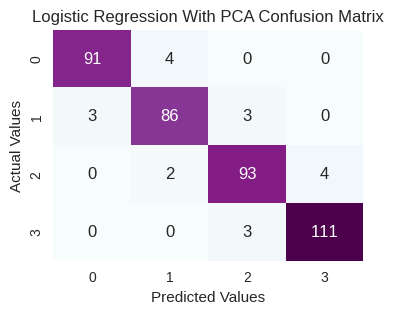

In [79]:
print('Logistic Regression With PCA Training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('Logistic Regression With PCA Testing Accuracy Score: ',accuracy_score(y_test,y_pred)*100)
cm_log=my_confusion_matrix(y_test, y_pred, 'Logistic Regression With PCA Confusion Matrix')

### ML Model II- Random Forest Classifier

#### 1. With just standard scaled input

In [51]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(x_train_sc, y_train)
y_pred_train = clsr.predict(x_train_sc)
y_pred = clsr.predict(x_test_sc)

Random forest Training Accuracy Score:  100.0
Random forest Testing Accuracy Score:  86.0
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        95
           1       0.78      0.82      0.80        92
           2       0.79      0.70      0.74        99
           3       0.91      0.94      0.92       114

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



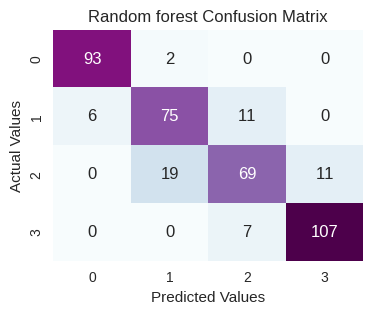

In [52]:
print('Random forest Training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('Random forest Testing Accuracy Score: ',accuracy_score(y_test,y_pred)*100)
cm_log=my_confusion_matrix(y_test, y_pred, 'Random forest Confusion Matrix')

#### 2. With Feature Selection input

In [53]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(x_train_best_sc, y_train_best)
y_pred_train = clsr.predict(x_train_best_sc)
y_pred = clsr.predict(x_test_best_sc)

Random forest with feature selection Training Accuracy Score:  100.0
Random forest with feature selection Testing Accuracy Score:  92.75
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.92      0.91      0.92        92
           2       0.89      0.86      0.87        99
           3       0.93      0.95      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



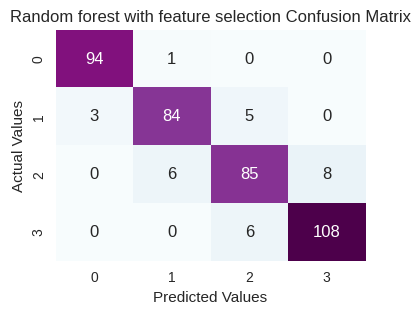

In [54]:
print('Random forest with feature selection Training Accuracy Score: ',accuracy_score(y_train_best,y_pred_train)*100)
print('Random forest with feature selection Testing Accuracy Score: ',accuracy_score(y_test_best,y_pred)*100)
cm_log=my_confusion_matrix(y_test_best, y_pred, 'Random forest with feature selection Confusion Matrix')

#### 3. With hyperparamter tuning

In [88]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)


In [89]:
clsr.fit(x_train_best_sc, y_train_best)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [90]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 200}

In [91]:
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features='auto', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [92]:
clsr.best_score_

0.8950057737396735

In [93]:
clsr = RandomForestClassifier(
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                        min_samples_split=4,
                       n_estimators=200)
clsr.fit(x_train_best_sc, y_train_best)

RandomForestClassifier(max_depth=30, max_features='auto', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [94]:
y_pred = clsr.predict(x_test_best_sc)
y_pred_train = clsr.predict(x_train_best_sc)

Random forest Classifier with hyperparamter tuning Training Accuracy Score:  96.25
Random forest Classifier with hyperparamter tuning Testing Accuracy Score:  89.75
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.86      0.86      0.86        92
           2       0.84      0.82      0.83        99
           3       0.93      0.94      0.93       114

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



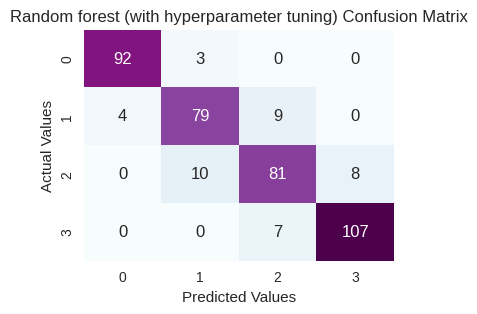

In [95]:
print('Random forest Classifier with hyperparamter tuning Training Accuracy Score: ',accuracy_score(y_train_best,y_pred_train)*100)
print('Random forest Classifier with hyperparamter tuning Testing Accuracy Score: ',accuracy_score(y_test_best,y_pred)*100)
cm_log=my_confusion_matrix(y_test, y_pred, 'Random forest (with hyperparameter tuning) Confusion Matrix')

#### 4. With PCA input

In [96]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(x_pca_train, y_train)
y_pred = clsr.predict(x_pca_test)
y_pred_train = clsr.predict(x_pca_train)

Random forest with PCA training Accuracy Score:  100.0
Random forest with PCA testing Accuracy Score:  70.0
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        95
           1       0.55      0.61      0.58        92
           2       0.57      0.52      0.54        99
           3       0.82      0.82      0.82       114

    accuracy                           0.70       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.70      0.70      0.70       400



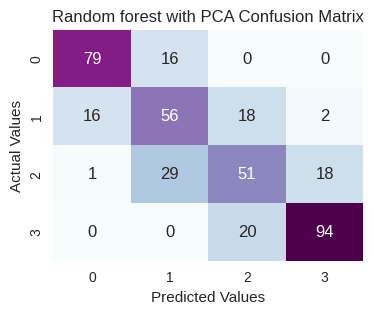

In [97]:
print('Random forest with PCA training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('Random forest with PCA testing Accuracy Score: ',accuracy_score(y_test,y_pred)*100)
cm_log=my_confusion_matrix(y_test, y_pred, 'Random forest with PCA Confusion Matrix')

### ML Model IV - KNN

#### 1. With standard input

KNN Classifier Training Accuracy Score:  71.3125
KNN Classifier Testing Accuracy Score:  49.0
              precision    recall  f1-score   support

           0       0.53      0.71      0.61        95
           1       0.32      0.46      0.38        92
           2       0.41      0.29      0.34        99
           3       0.81      0.51      0.62       114

    accuracy                           0.49       400
   macro avg       0.52      0.49      0.49       400
weighted avg       0.53      0.49      0.49       400



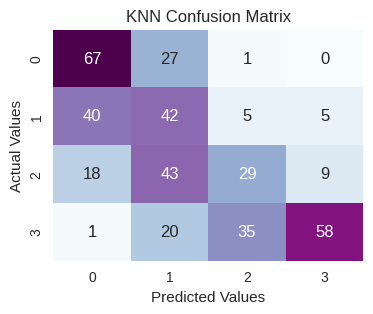

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(x_train_sc, y_train)
y_pred_knn=knn.predict(x_test_sc)
y_pred_train=knn.predict(x_train_sc)
print('KNN Classifier Training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('KNN Classifier Testing Accuracy Score: ',accuracy_score(y_test,y_pred_knn)*100)
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

#### 2. With Feature selection input

KNN Classifier Training Accuracy Score:  93.4375
KNN Classifier Testing Accuracy Score:  82.25
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.74      0.78      0.76        92
           2       0.72      0.72      0.72        99
           3       0.92      0.84      0.88       114

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



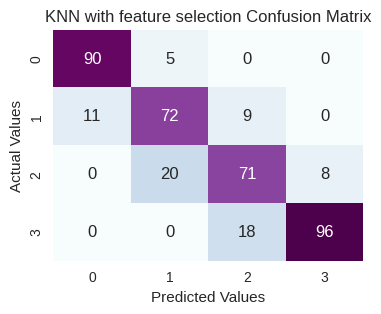

In [99]:
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(x_train_best_sc, y_train_best)
y_pred_train=knn.predict(x_train_best_sc)
y_pred_knn=knn.predict(x_test_best_sc)
print('KNN Classifier Training Accuracy Score: ',accuracy_score(y_train_best,y_pred_train)*100)
print('KNN Classifier Testing Accuracy Score: ',accuracy_score(y_test_best,y_pred_knn)*100)
cm_rfc=my_confusion_matrix(y_test_best, y_pred_knn, 'KNN with feature selection Confusion Matrix')

#### 3. With hyperparameter tuning

In [100]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,50)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train_best_sc, y_train_best, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

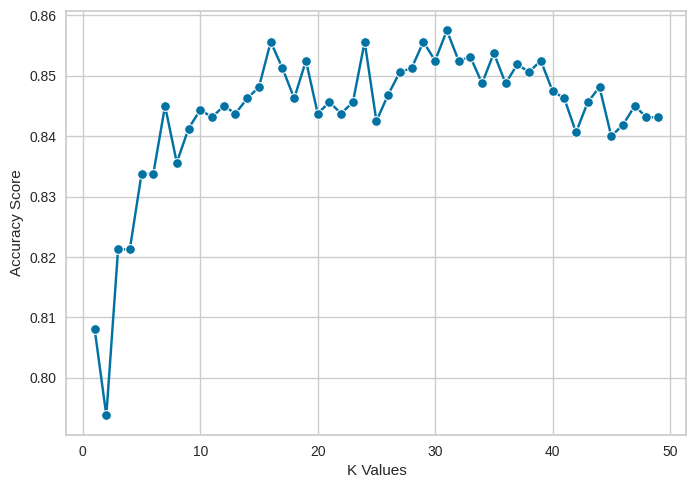

In [101]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [102]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print(best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_best_sc, y_train_best)
y_pred_train = knn.predict(x_train_best_sc)
y_pred = knn.predict(x_test_best_sc)

31


KNN Classifier Training Accuracy Score:  89.0
KNN Classifier Accuracy Score:  86.0
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        95
           1       0.84      0.83      0.83        92
           2       0.73      0.84      0.78        99
           3       0.97      0.81      0.88       114

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



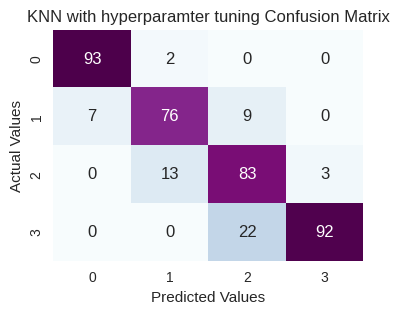

In [103]:
print('KNN Classifier Training Accuracy Score: ',accuracy_score(y_train_best,y_pred_train)*100)
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test_best,y_pred)*100)
cm_rfc=my_confusion_matrix(y_test, y_pred, 'KNN with hyperparamter tuning Confusion Matrix')

#### 4. With PCA input

KNN Classifier Training Accuracy Score:  68.375
KNN Classifier Testing Accuracy Score:  65.0
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        95
           1       0.51      0.59      0.55        92
           2       0.50      0.60      0.54        99
           3       0.87      0.63      0.73       114

    accuracy                           0.65       400
   macro avg       0.67      0.65      0.65       400
weighted avg       0.68      0.65      0.66       400



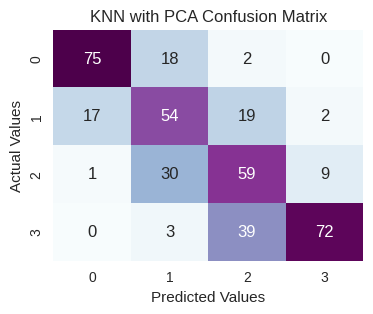

In [104]:
knn = KNeighborsClassifier(n_neighbors=31,leaf_size=25)
knn.fit(x_pca_train, y_train)
y_pred_knn=knn.predict(x_pca_test)
y_pred_train=knn.predict(x_pca_train)
print('KNN Classifier Training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('KNN Classifier Testing Accuracy Score: ',accuracy_score(y_test,y_pred_knn)*100)
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN with PCA Confusion Matrix')

### ML Model V - SVM

#### 1. With standard input

SVM Classifier Training Accuracy Score:  98.25
SVM Classifier Testing Accuracy Score:  89.0
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.82      0.89      0.85        92
           2       0.82      0.84      0.83        99
           3       0.96      0.89      0.93       114

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



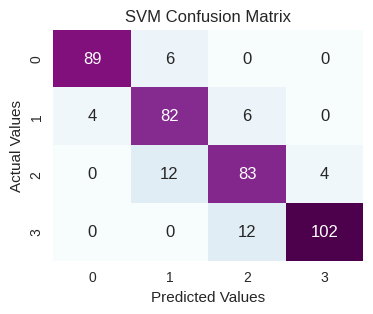

In [105]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(x_train_sc, y_train)
y_pred_train=svm_clf.predict(x_train_sc)
y_pred_svm=svm_clf.predict(x_test_sc)
print('SVM Classifier Training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('SVM Classifier Testing Accuracy Score: ',accuracy_score(y_test,y_pred_svm)*100)
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

#### 2. With Feature Selection input

SVM Classifier Training Accuracy Score:  96.25
SVM Classifier Testing Accuracy Score:  95.75
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.96      0.95      0.95        92
           2       0.95      0.93      0.94        99
           3       0.96      0.96      0.96       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



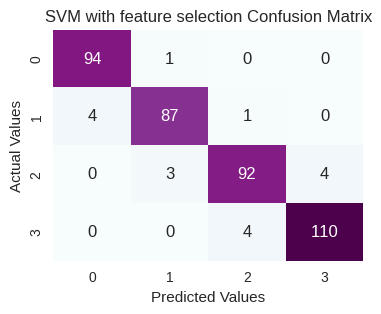

In [106]:
svm_clf = svm.SVC()
svm_clf.fit(x_train_best_sc, y_train_best)
y_pred_svm=svm_clf.predict(x_test_best_sc)
y_pred_train=svm_clf.predict(x_train_best_sc)
print('SVM Classifier Training Accuracy Score: ',accuracy_score(y_train_best,y_pred_train)*100)
print('SVM Classifier Testing Accuracy Score: ',accuracy_score(y_test_best,y_pred_svm)*100)
cm_rfc=my_confusion_matrix(y_test_best, y_pred_svm, 'SVM with feature selection Confusion Matrix')

#### 3. With hyperparamter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]


In [108]:
svm_model=svm.SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm_model,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_train_best_sc,y_train_best)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9662500000000002
best param:  {'C': 0.5, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


SVM Classifier Training Accuracy Score:  96.25
SVM Classifier Accuracy Score:  95.75
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.96      0.95      0.95        92
           2       0.95      0.93      0.94        99
           3       0.96      0.96      0.96       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



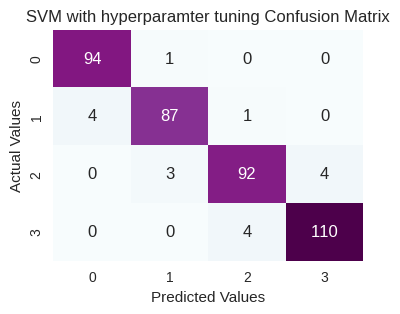

In [109]:
svm_model=svm.SVC(C=0.5,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)
svm_model.fit(x_train_best_sc,y_train_best)
y_pred_svm=svm_clf.predict(x_test_best_sc)
y_pred_train=svm_clf.predict(x_train_best_sc)
print('SVM Classifier Training Accuracy Score: ',accuracy_score(y_train_best,y_pred_train)*100)
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test_best,y_pred_svm)*100)
cm_rfc=my_confusion_matrix(y_test_best, y_pred_svm, 'SVM with hyperparamter tuning Confusion Matrix')

#### 4.With PCA input

SVM Classifier Training Accuracy Score:  98.0
SVM Classifier Accuracy Score:  88.25
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        95
           1       0.82      0.87      0.84        92
           2       0.81      0.84      0.82        99
           3       0.96      0.89      0.92       114

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



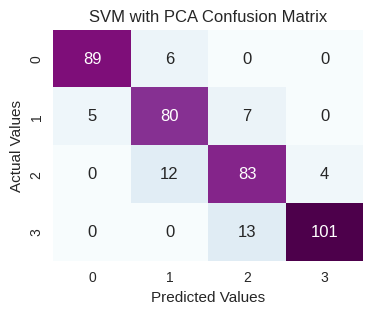

In [110]:
svm_clf = svm.SVC()
svm_clf.fit(x_pca_train, y_train)
y_pred_svm=svm_clf.predict(x_pca_test)
y_pred_train=svm_clf.predict(x_pca_train)
print('SVM Classifier Training Accuracy Score: ',accuracy_score(y_train,y_pred_train)*100)
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm)*100)
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM with PCA Confusion Matrix')

# 6. Implementation of Deep Learning Model: ANN

#### Importing required library for deep learning technique

In [66]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import keras
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from keras.layers import Dropout
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder

### Implementation-I Basic architecture with all 20 features

In [69]:
y_train = y_train.values
y_train = y_train.reshape(-1,1)
ohot = OneHotEncoder()
y_train = ohot.fit_transform(y_train)
y_train=y_train.toarray()

In [70]:
test_size = 0.5
x_valid, x_test1, y_valid, y_test1 = train_test_split(x_test_sc,y_test, test_size=0.5)
print(x_valid.shape), print(y_valid.shape)
print(x_test1.shape), print(y_test1.shape)

(200, 20)
(200,)
(200, 20)
(200,)


(None, None)

In [71]:
y_valid = y_valid.values
y_valid = y_valid.reshape(-1,1)
ohot = OneHotEncoder()
y_valid = ohot.fit_transform(y_valid)
y_valid=y_valid.toarray()

In [72]:
y_valid.shape

(200, 4)

In [73]:
y_test1 = y_test1.values
y_test1 = y_test1.reshape(-1,1)
ohot = OneHotEncoder()
y_test1 = ohot.fit_transform(y_test1)
y_test1=y_test1.toarray()

In [74]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim = 20))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model.fit(x_train_sc,y_train,epochs=100,validation_data=(x_valid,y_valid),batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 1,860
Trainable params: 1,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 3s 25ms/step - loss: 1.3947 - accuracy: 0.3000 - val_loss: 1.3104 - val_accuracy: 0.3800
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 1.2649 - accuracy: 0.4112 - val_loss: 1.1992 - val_accuracy: 0.4750
Epoch 3/100
25/25 [================

In [75]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="Basic architecture with all 20 input features")

In [76]:
y_pred = model.predict(x_test1)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test1)):
    test.append(np.argmax(y_test1[i]))



7/7 [==============================] - 0s 2ms/step


In [77]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 95.0


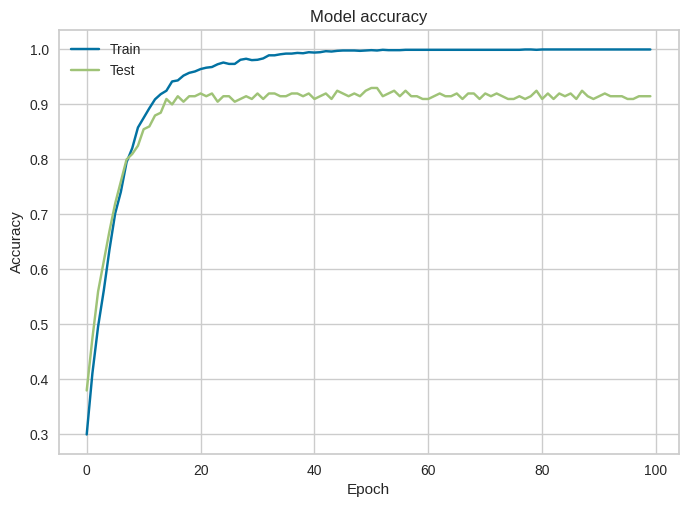

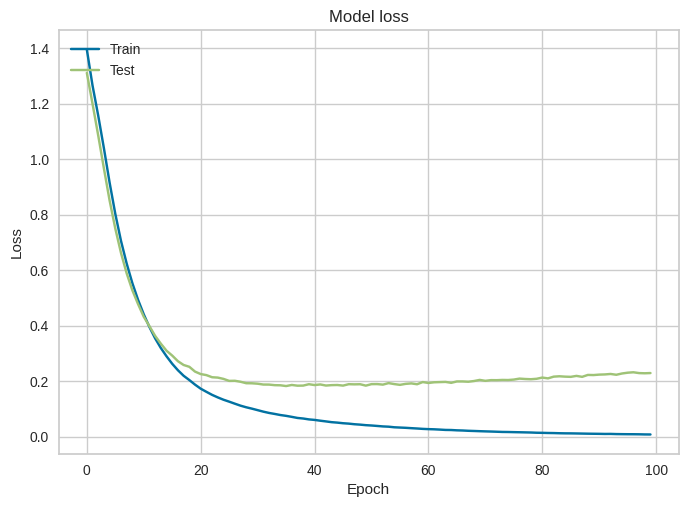

In [78]:
#Visualising Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Visualising Model Loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Implementation-II Basic architecture with feature selection and 5 best features input

In [79]:
y_train_best = y_train_best.values
y_train_best = y_train_best.reshape(-1,1)
ohot = OneHotEncoder()
y_train_best = ohot.fit_transform(y_train_best)
y_train_best=y_train_best.toarray()

In [80]:
test_size = 0.5
x_valid, x_test1, y_valid, y_test1 = train_test_split(x_test_best_sc,y_test_best, test_size=0.5)
print(x_valid.shape), print(y_valid.shape)
print(x_test1.shape), print(y_test1.shape)

(200, 5)
(200,)
(200, 5)
(200,)


(None, None)

In [81]:
y_valid = y_valid.values
y_valid = y_valid.reshape(-1,1)
ohot = OneHotEncoder()
y_valid = ohot.fit_transform(y_valid)
y_valid=y_valid.toarray()

In [82]:
y_test1 = y_test1.values
y_test1 = y_test1.reshape(-1,1)
ohot = OneHotEncoder()
y_test1 = ohot.fit_transform(y_test1)
y_test1=y_test1.toarray()

In [83]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim = 5))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

history = model.fit(x_train_best_sc,y_train_best,epochs=100,validation_data=(x_valid,y_valid),batch_size=64)

ann_viz(model, title="Basic architecture with feature selection and using 5 best features")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                192       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 1,380
Trainable params: 1,380
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 1.2786 - accuracy: 0.4025 - val_loss: 1.1438 - val_accuracy: 0.4700
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 1.1296 - accuracy: 0.4625 - val_loss: 0.9933 - val_accuracy: 0.6400
Epoch 3/100
25/25 [==============

In [84]:
y_pred = model.predict(x_test1)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test1)):
    test.append(np.argmax(y_test1[i]))

7/7 [==============================] - 0s 3ms/step


In [85]:
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 98.5


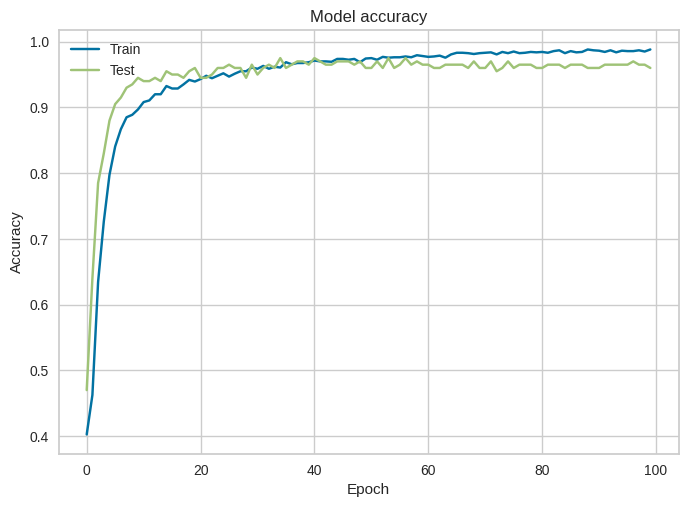

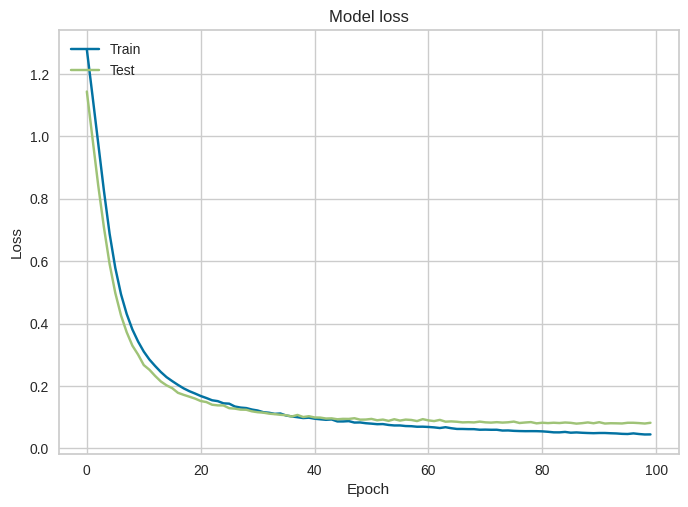

In [86]:
#Visualising Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Visualising Model Loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Implementation-II ANN with dropout layers and regularisation techniques

In [88]:
from keras.callbacks import EarlyStopping

In [97]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim = 5,kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(4,activation='softmax'))
model.summary()

#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss')
history = model.fit(x_train_best_sc,y_train_best,epochs=100,validation_data=(x_valid,y_valid),batch_size=64,callbacks=[es])

ann_viz(model, title="ANN with dropout layers and regularisation techniques")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                192       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 4)                 132       
                                                                 
Total params: 1,380
Trainable params: 1,380
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] -

In [98]:
y_pred = model.predict(x_test1)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test1)):
    test.append(np.argmax(y_test1[i]))

7/7 [==============================] - 0s 2ms/step


In [99]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 97.5


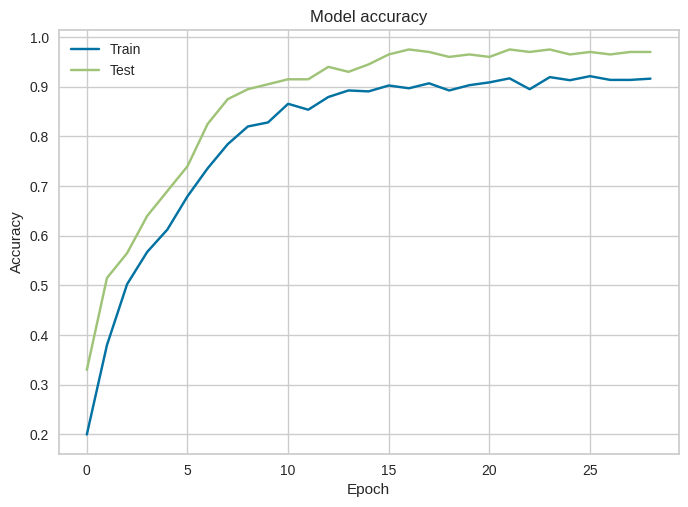

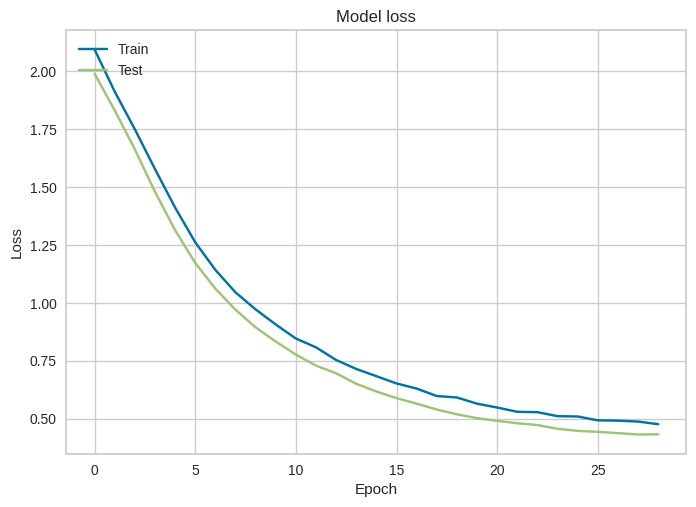

In [100]:
#Visualising Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Visualising Model Loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Implementation-II ANN with hyperparamter tuning and best features

In [52]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier


In [53]:
# repeat some of the initial values here so we make sure they were not changed
input_dim = 5
num_classes = 4

# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def create_model_2(optimizer='Adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer=init, activation=tf.nn.softmax))

    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])

    return model

In [54]:
%%time
# fix random seed for reproducibility (this might work or might not work 
# depending on each library's implenentation)
seed = 7
np.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
batches = [32, 64]
epochs = [10, 20,40,60,100]
optimizers=['Adam', 'SGD', 'RMSprop','Nadam',]
#learning_rate=[0.1,0.01,1e-3,1e-4,1e-5]
#activationL = ['relu', 'sigmoid', 'tanh','exponential', 'LeakyReLU']
# grid search for initializer, batch size and number of epochs
param_grid = dict(optimizer=optimizers,epochs=epochs, batch_size=batches, init=init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(x_train_best_sc, y_train_best)

Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 4ms/step - loss: 0.1002 - accuracy: 0.9634
Epoch 75/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0946 - accuracy: 0.9606
Epoch 76/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.9681
Epoch 77/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0918 - accuracy: 0.9653
Epoch 78/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0923 - accuracy: 0.9653
Epoch 79/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.9663
Epoch 80/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0994 - accuracy: 0.9634
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0981 - accuracy: 0.9606
Epoch 82/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0942 - accuracy: 0.9569
Epoch 83/100
17/17 [==============================] - 0s 5ms/s

In [55]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9725 using {'batch_size': 32, 'epochs': 60, 'init': 'uniform', 'optimizer': 'Nadam'}


In [67]:
model = Sequential()
model.add(Dense(64, input_dim=5, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(4, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])


history = model.fit(x_train_best_sc,y_train_best,epochs=60,validation_data=(x_valid,y_valid),batch_size=32)


Epoch 1/60
50/50 [==============================] - 3s 10ms/step - loss: 1.3523 - accuracy: 0.5094 - val_loss: 1.2312 - val_accuracy: 0.5400
Epoch 2/60
50/50 [==============================] - 0s 4ms/step - loss: 0.9496 - accuracy: 0.5063 - val_loss: 0.7245 - val_accuracy: 0.5600
Epoch 3/60
50/50 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.6944 - val_loss: 0.5292 - val_accuracy: 0.8650
Epoch 4/60
50/50 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.8838 - val_loss: 0.3378 - val_accuracy: 0.8900
Epoch 5/60
50/50 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.9300 - val_loss: 0.2239 - val_accuracy: 0.9650
Epoch 6/60
50/50 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 0.9475 - val_loss: 0.1756 - val_accuracy: 0.9600
Epoch 7/60
50/50 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9494 - val_loss: 0.1611 - val_accuracy: 0.9350
Epoch 8/60
50/50 [=

In [68]:
y_pred = model.predict(x_test1)

#lets do the inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test1)):
    test.append(np.argmax(y_test1[i]))

7/7 [==============================] - 0s 2ms/step


In [70]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 99.0


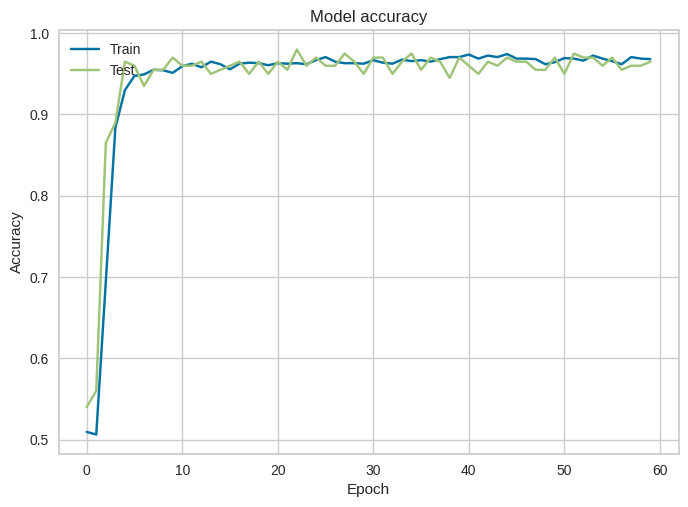

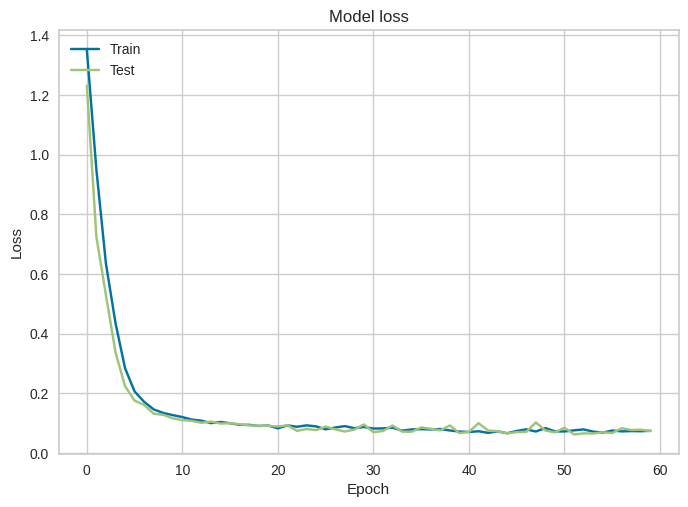

In [71]:
#Visualising Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Visualising Model Loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()